# Machine Learning - Proyecto final (COVID 19)

Intentaremos predicir si un paciente con COVID 19 vive o muere con base en características.

La base de datos nos menciona que los valores 1 significan "Si" y los valores 0 significan "No", los valores 97 y 99 significa que no hay datos.

* Sexo: 1 para mujer y 2 para hombre.
* Edad: del paciente.
* Clasificación: resultados de la prueba covid. Los valores 1-3 significan que el paciente fue diagnosticado con covid en diferentes grados 4 o superior significa que el paciente no es portador de covid o que la prueba no es concluyente.
* Tipo de paciente: tipo de atención que recibió el paciente en la unidad. 1 por regreso a casa y 2 por hospitalización.
* Neumonía: si el paciente ya tiene inflamación de los alvéolos o no.
* Embarazo: si la paciente está embarazada o no.
* Diabetes: si el paciente tiene diabetes o no.
* COPD: Indica si el paciente tiene enfermedad pulmonar obstructiva crónica o no.
* Asma: si el paciente tiene asma o no.
* Inmsupr: si el paciente está inmunodeprimido o no.
* Hipertensión: si el paciente tiene hipertensión o no.
* Cardiovascular: si el paciente tiene una enfermedad relacionada con el corazón o los vasos sanguíneos.
* Crónico renal: si el paciente tiene enfermedad renal crónica o no.
* Otra enfermedad: si el paciente tiene otra enfermedad o no.
* Obesidad: si el paciente es obeso o no.
* Tabaco: si el paciente es consumidor de tabaco.
* Usmr: Indica si el paciente atendió unidades médicas de primer, segundo o tercer nivel.
* Unidad médica: tipo de institución del Sistema Nacional de Salud que brinda la atención.
* Intubado: si el paciente estaba conectado al ventilador.
* Icu: Indica si el paciente estuvo ingresado en una Unidad de Cuidados Intensivos.
* Fecha de fallecimiento: Si el paciente falleció indicar la fecha de fallecimiento, y 9999-99-99 en caso contrario.

## Fase 1 - Estructurar el Conjunto de Datos

- Adquisición de Datos
- Exploración de Datos
- Preprocesamiento

In [2]:
import pandas as pd
#Importamos el data set
data = pd.read_csv("https://raw.githubusercontent.com/Ramssesdlsm/Machine-Learning-CIC/main/Data%20set/Covid%20Data.csv")
data.sample(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
764550,1,12,2,1,9999-99-99,97,2,53,97,2,...,2,2,2,2,2,2,2,2,7,97
223241,1,4,2,2,9999-99-99,99,99,26,97,2,...,2,2,2,1,2,2,2,2,7,99
695115,2,12,2,1,9999-99-99,97,2,34,97,2,...,2,2,2,2,2,2,2,1,6,97
761164,2,12,1,1,9999-99-99,97,2,52,2,2,...,2,2,2,2,2,2,2,2,7,97
166385,1,4,2,1,9999-99-99,97,99,11,97,2,...,2,2,2,2,2,2,2,2,6,97


In [3]:
#Vamos a eliminar los registros que tengan valores nulos
data = data.dropna()
data.shape

(1048575, 21)

In [4]:
#Pasamos los datos con 9999-99-99 a 00/00/0000
data["DATE_DIED"] = data["DATE_DIED"].apply(lambda x: "30/12/2099" if x == "9999-99-99" else x)
#Formateamos la fecha
data["DATE_DIED"] = pd.to_datetime(data["DATE_DIED"], format="%d/%m/%Y")

In [5]:
data["DATE_DIED"].sort_values().unique()

<DatetimeArray>
['2020-01-02 00:00:00', '2020-01-03 00:00:00', '2020-01-04 00:00:00',
 '2020-01-05 00:00:00', '2020-01-06 00:00:00', '2020-01-07 00:00:00',
 '2020-01-08 00:00:00', '2020-01-09 00:00:00', '2020-01-10 00:00:00',
 '2020-01-11 00:00:00',
 ...
 '2021-04-24 00:00:00', '2021-04-25 00:00:00', '2021-04-26 00:00:00',
 '2021-04-27 00:00:00', '2021-04-28 00:00:00', '2021-04-29 00:00:00',
 '2021-04-30 00:00:00', '2021-05-01 00:00:00', '2021-05-02 00:00:00',
 '2099-12-30 00:00:00']
Length: 401, dtype: datetime64[ns]

In [6]:
data["Estatus"] = 1
#Si el valor de DATE_DIED es diferente de 2099-12-30 significa que la persona murio, así contaremos el número de decesos
data.loc[data["DATE_DIED"] != "2099-12-30", "Estatus"] = 0

In [7]:
#Veamos cuantos murieron y cuantos no
data["Estatus"].value_counts()
#Recordemos que 1 significa vivo y 0 muerto

Estatus
1    971633
0     76942
Name: count, dtype: int64

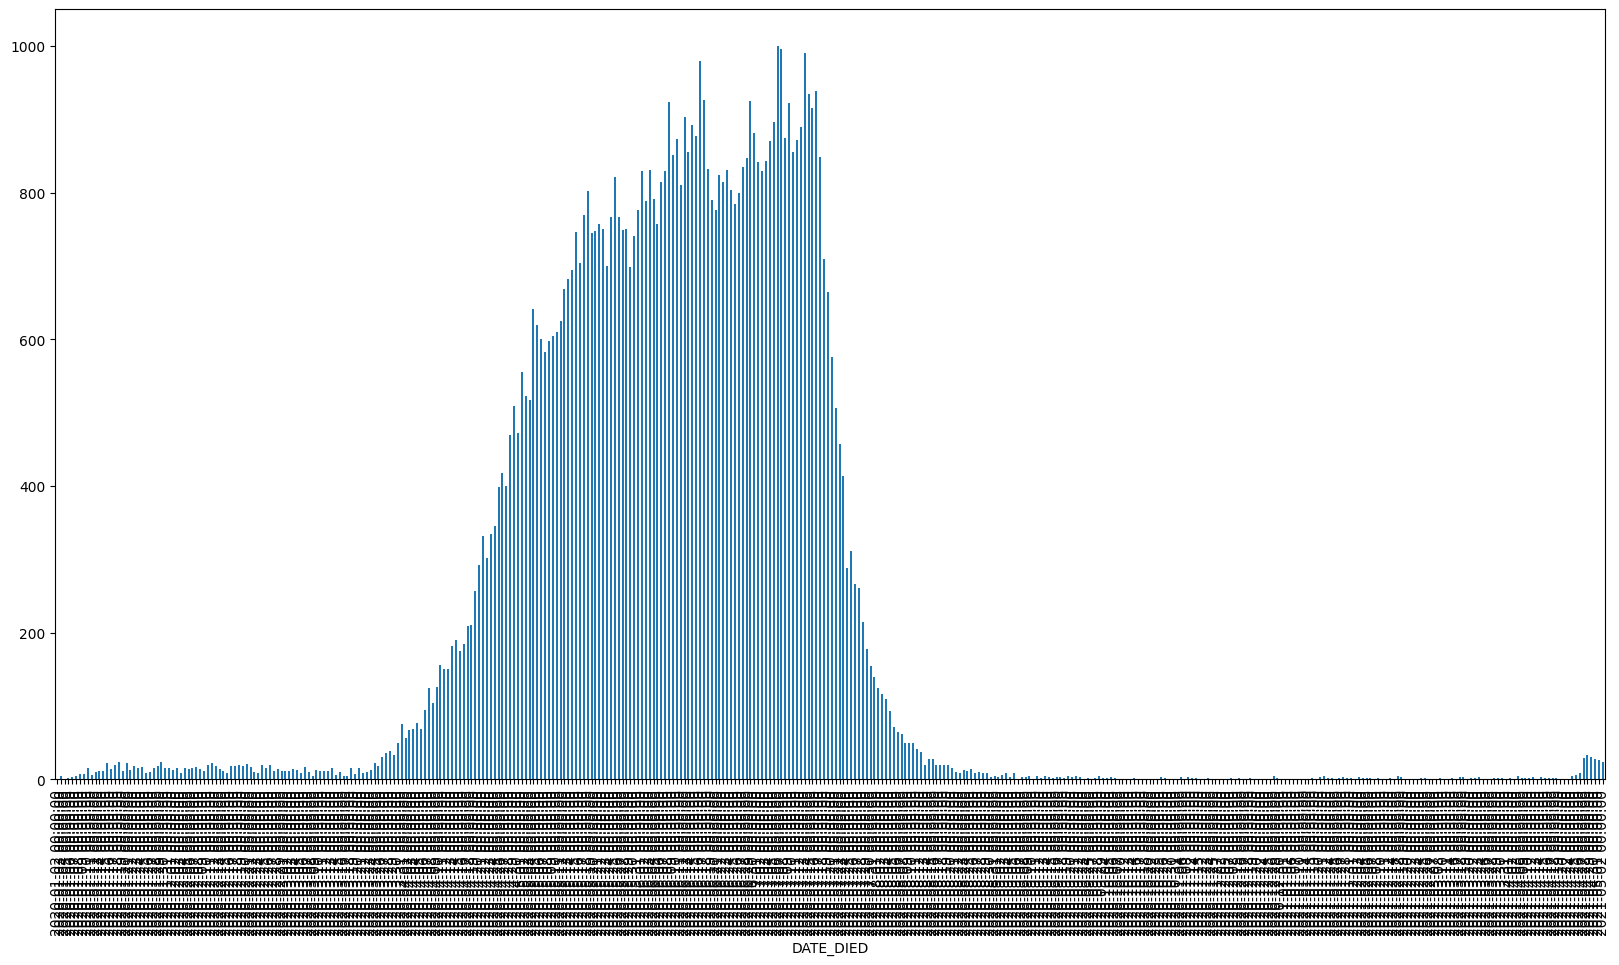

In [8]:
import matplotlib.pyplot as plt

#Graficamos el numero de decesos por día, graficamos unicamente los que tienen valor 1 en la columna estatus
data.loc[data["Estatus"] == 0, "DATE_DIED"].value_counts().sort_index().plot(kind="bar", figsize=(20, 10))
plt.xticks(rotation=90)
plt.show()


El formato de la gráfica anterior no es el adecuado, procemos a graficarlo por mes y enfocandonos en el año 2020.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

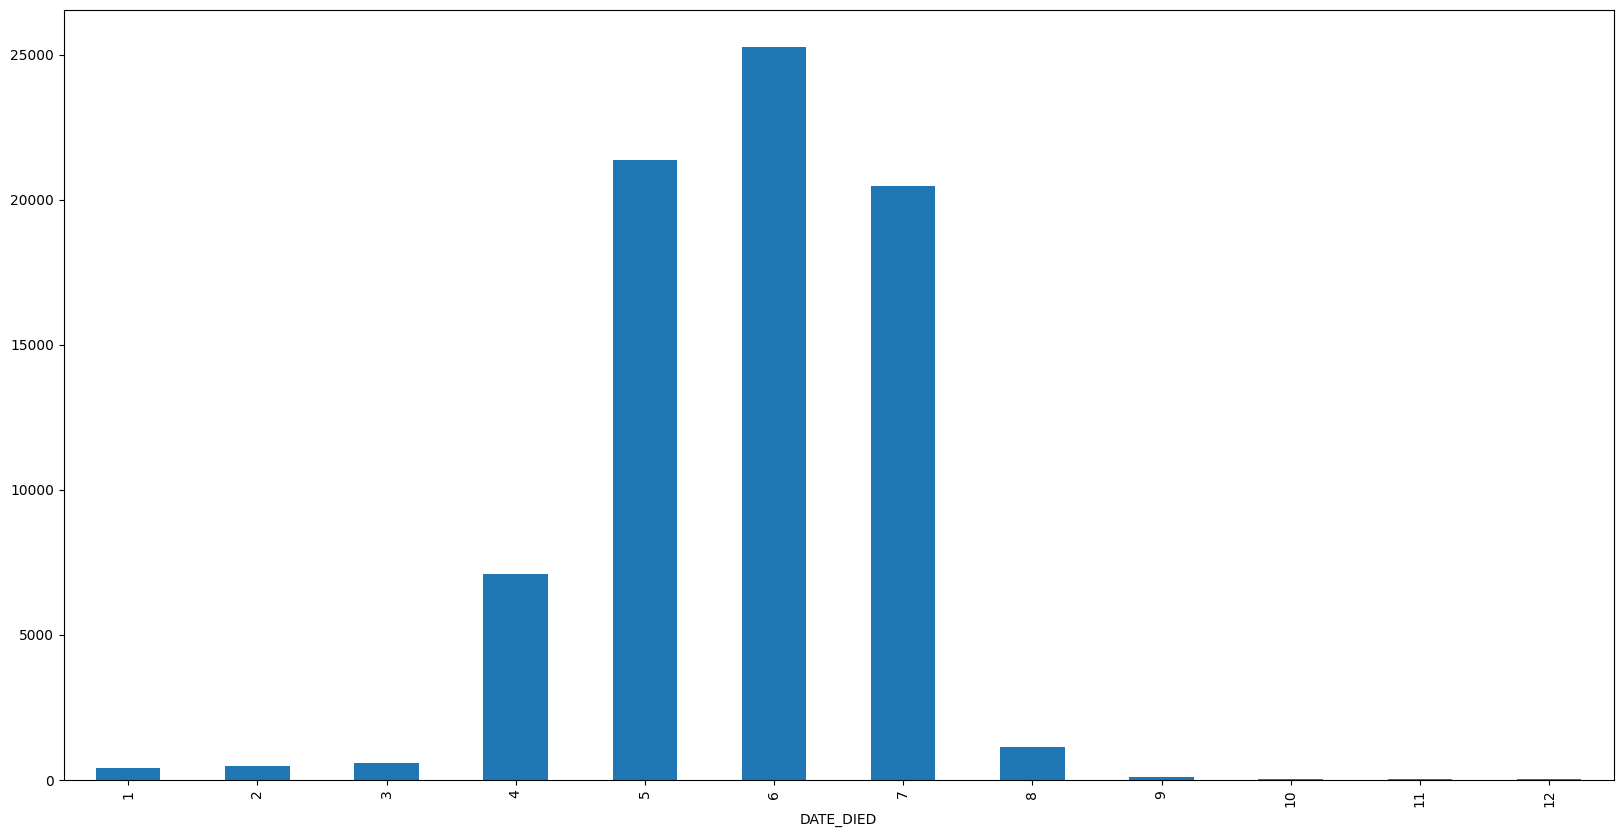

In [9]:
#Graficamos el numero de decesos por mes, graficamos unicamente los que tienen valor 1 en la columna estatus
data.loc[data["Estatus"] == 0, "DATE_DIED"].dt.month.value_counts().sort_index().plot(kind="bar", figsize=(20, 10))
plt.xticks(rotation=90)

Puede ser de interés para nosotros saber cuando algún paciente fue internado o mandado a casa para su recuperación, podría interesarnos saber si hay otros factores que contribuyen a que el paciente experimente síntomas más fuertes o en su caso la muerte. También puede ser de nuestro interés saber si hay algún grupo de edad en el que los casos de covid fueron más graves.

In [10]:
#Hagamos una función para obsevar la distribución de los decesos por una característica
def distribucion_decesos(car):
    data.loc[data["Estatus"] == 0, car].value_counts().sort_index().plot(kind="bar", figsize=(20, 10))
    plt.title(f"Decesos por {car}")
    plt.xticks(rotation=90)
    plt.show()
    print(data.loc[data["Estatus"] == 0, car].describe())

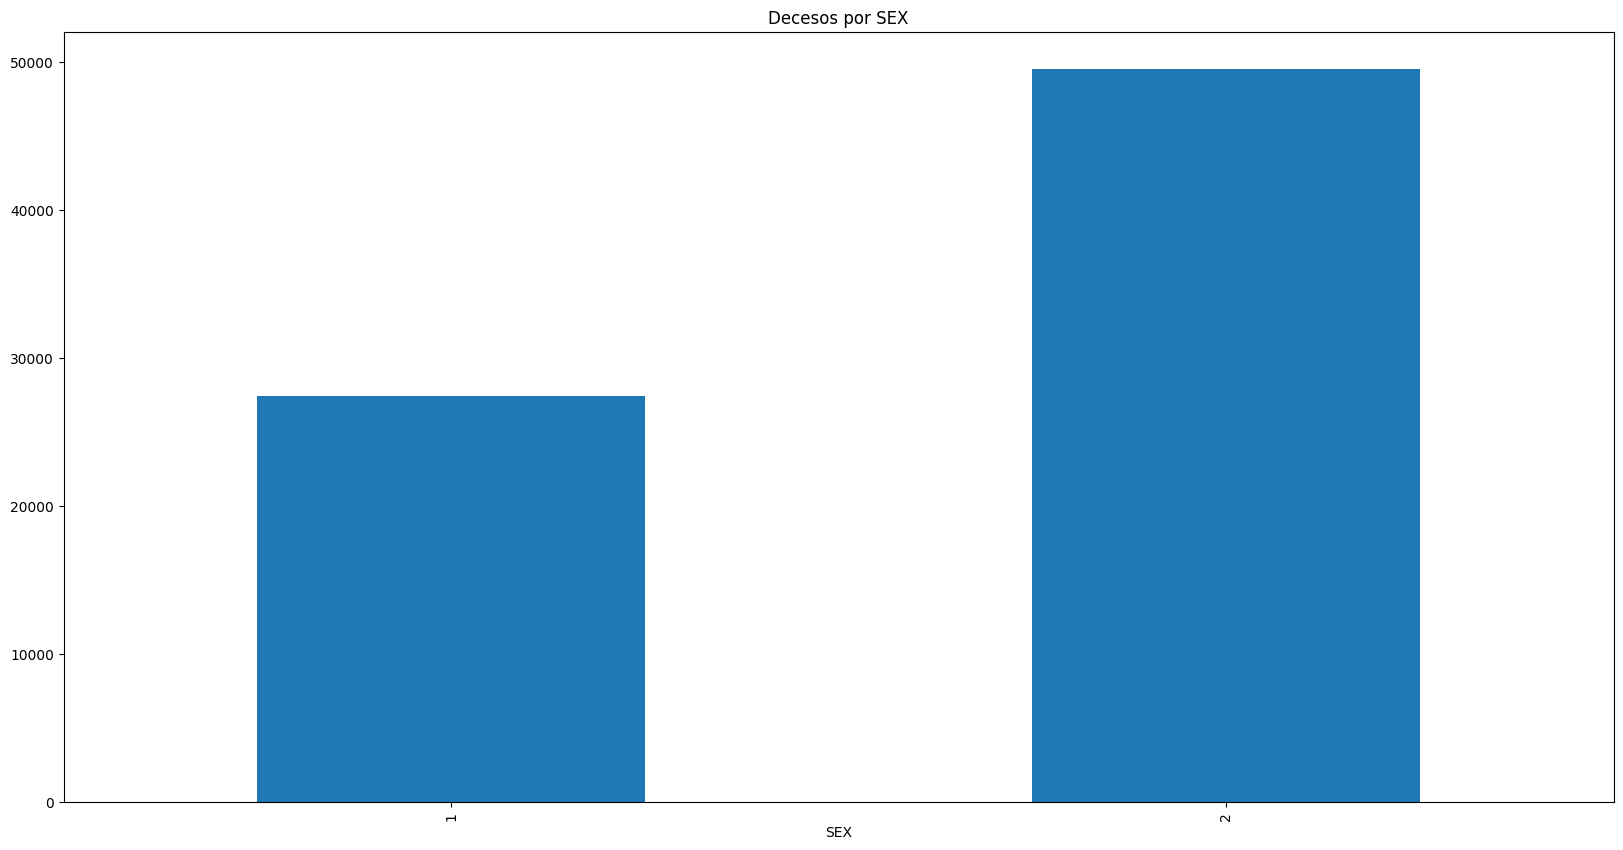

count    76942.000000
mean         1.643862
std          0.478860
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: SEX, dtype: float64


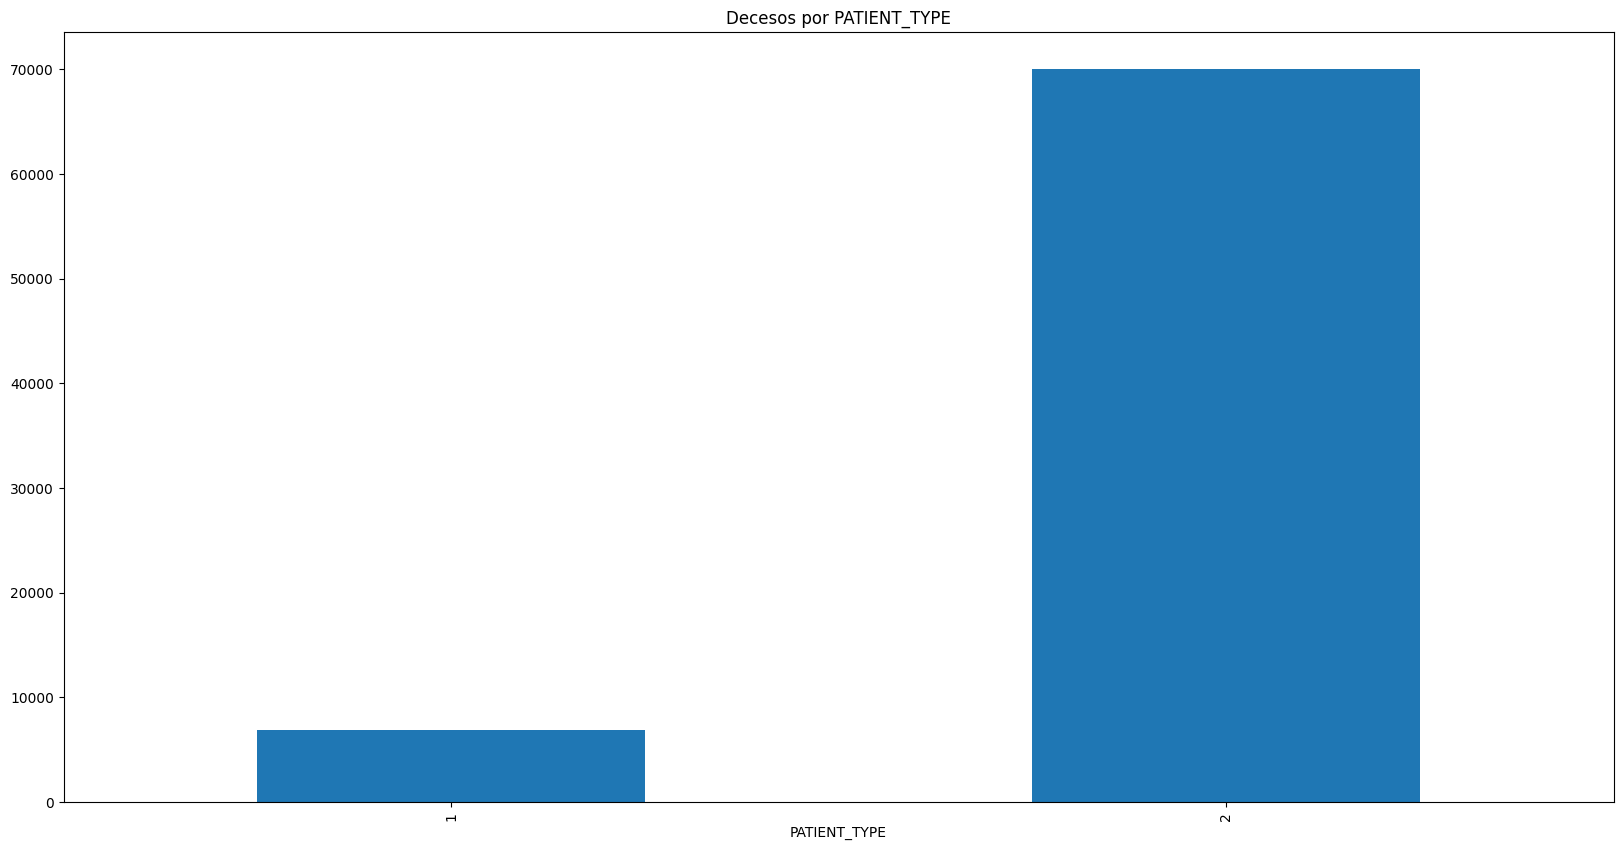

count    76942.000000
mean         1.910634
std          0.285273
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: PATIENT_TYPE, dtype: float64


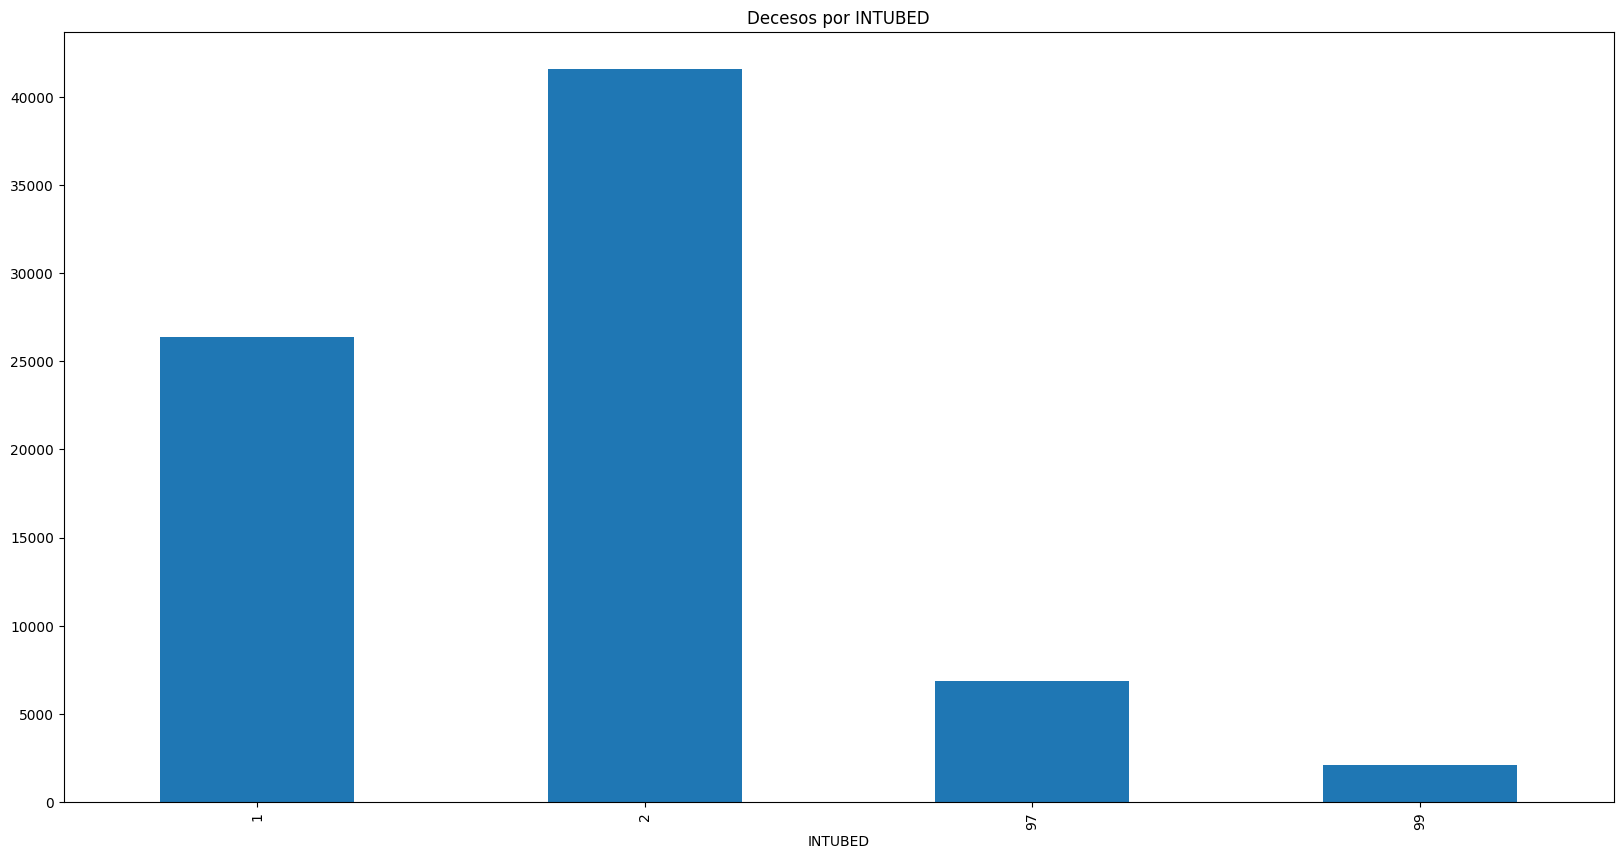

count    76942.000000
mean        12.774181
std         30.751365
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         99.000000
Name: INTUBED, dtype: float64


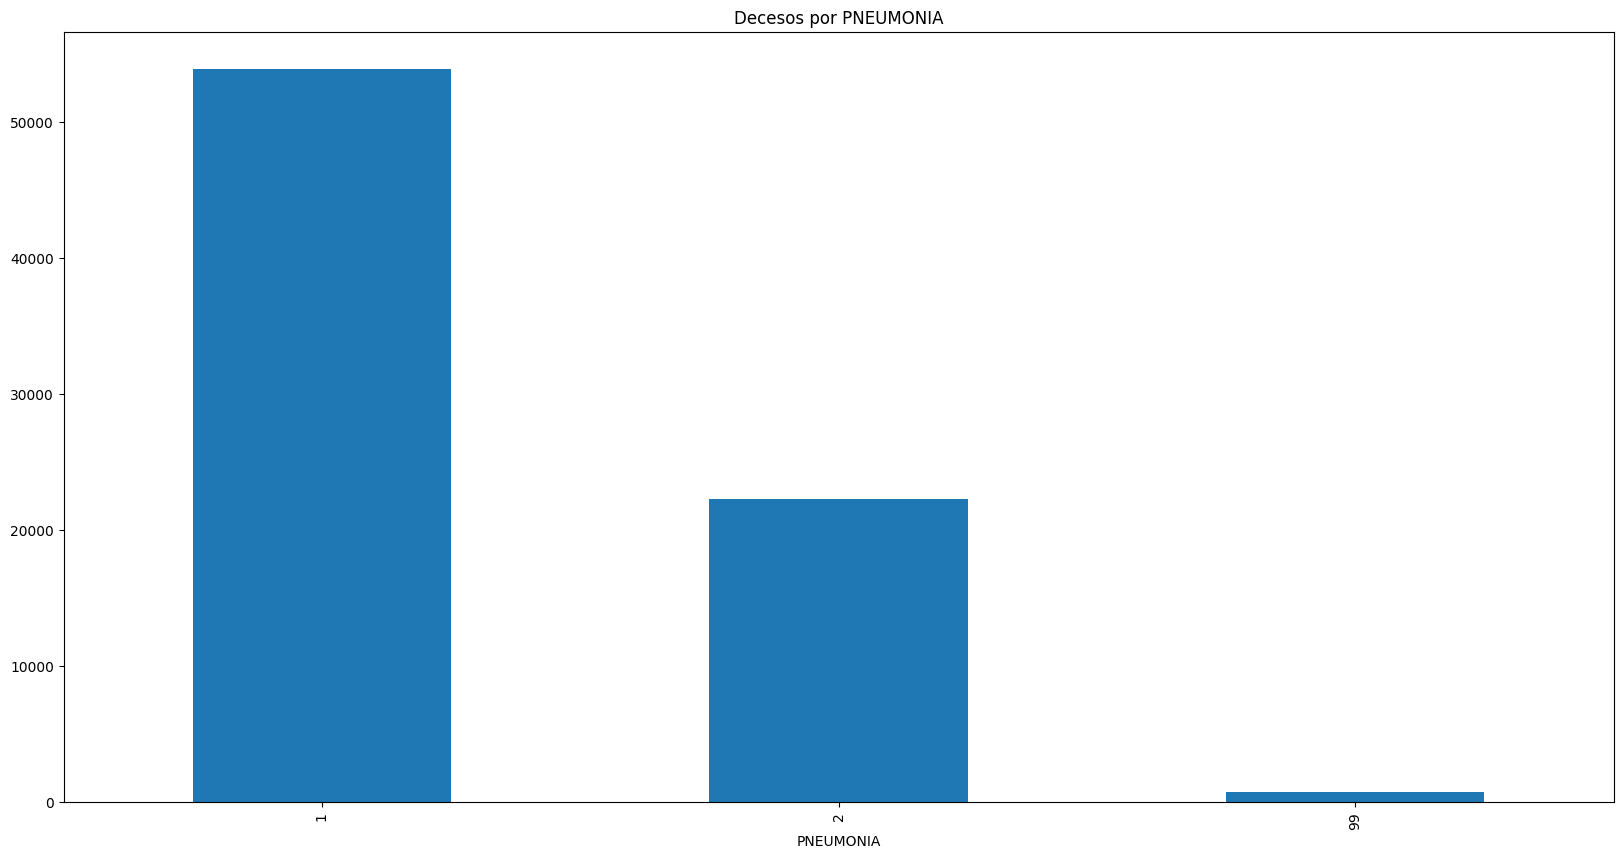

count    76942.000000
mean         2.224520
std          9.508427
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         99.000000
Name: PNEUMONIA, dtype: float64


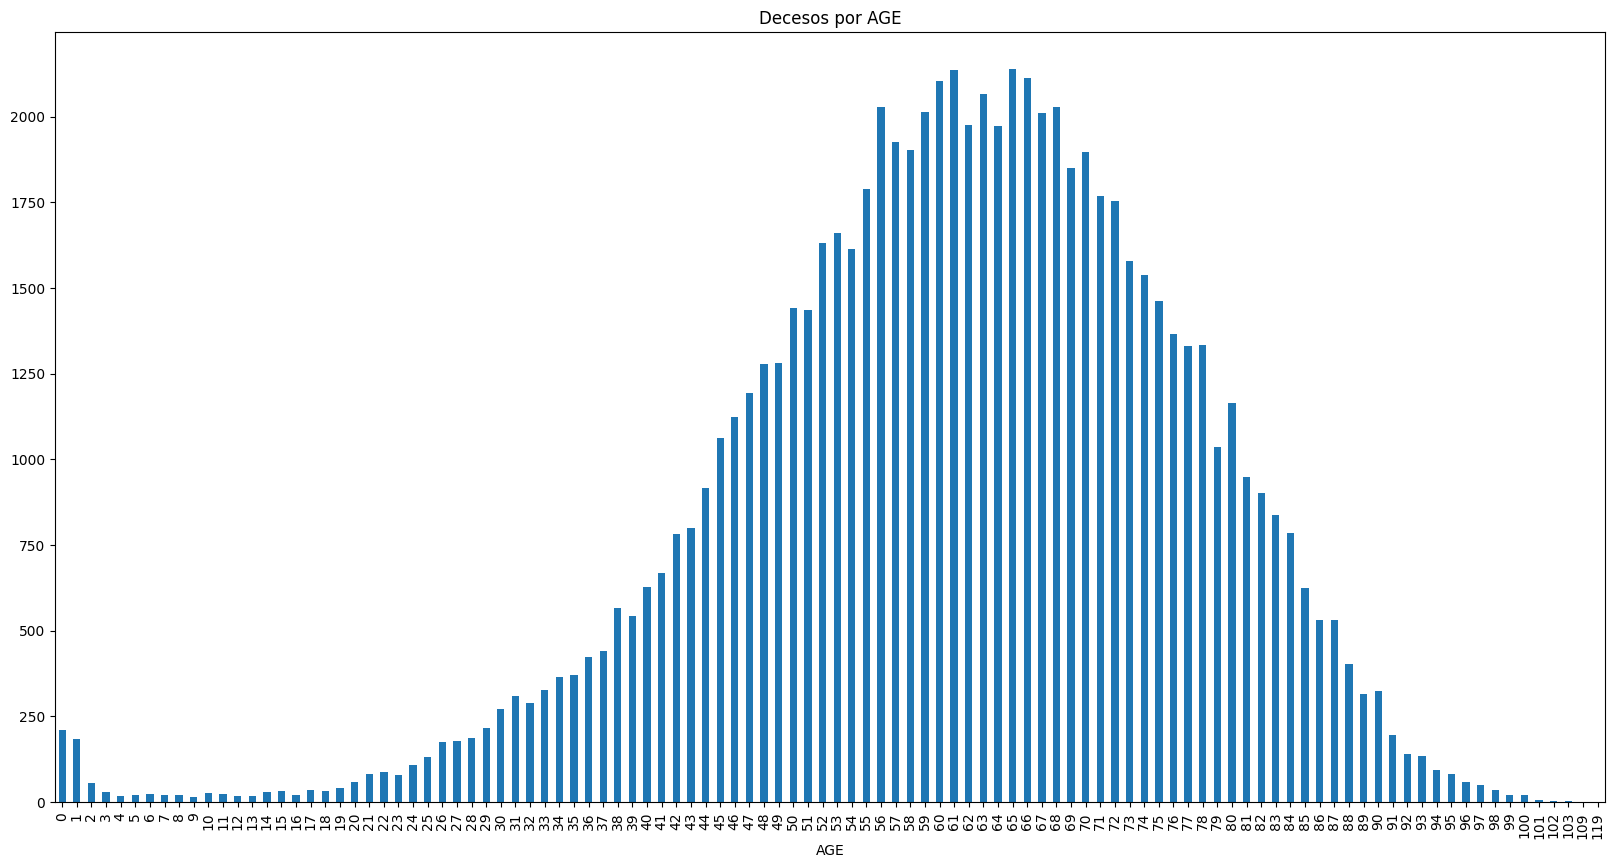

count    76942.000000
mean        61.068545
std         15.366451
min          0.000000
25%         52.000000
50%         62.000000
75%         72.000000
max        119.000000
Name: AGE, dtype: float64


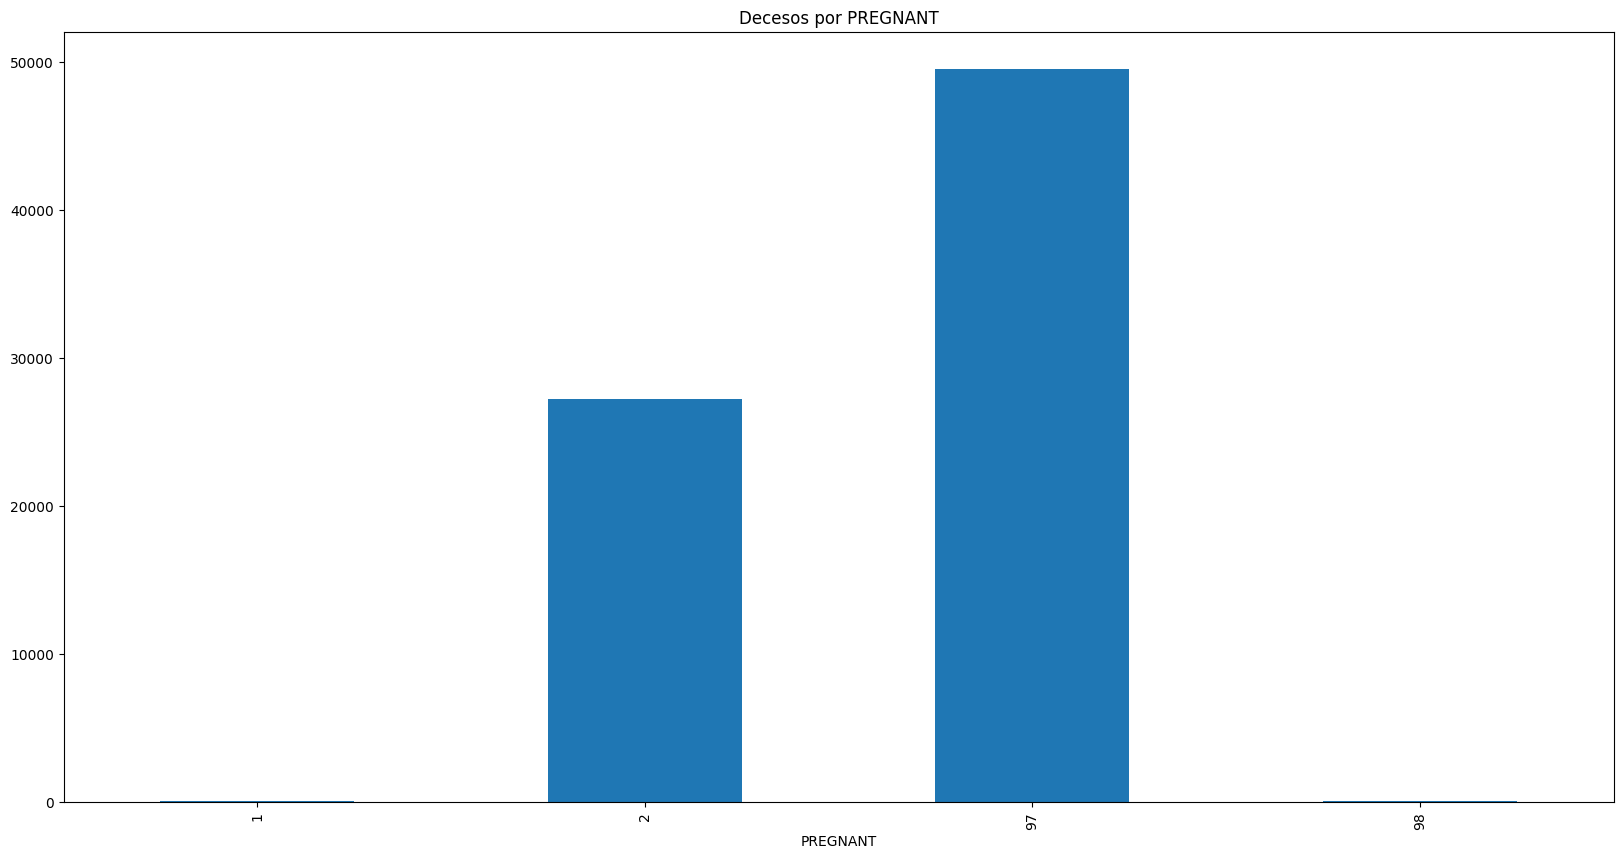

count    76942.000000
mean        63.249292
std         45.468984
min          1.000000
25%          2.000000
50%         97.000000
75%         97.000000
max         98.000000
Name: PREGNANT, dtype: float64


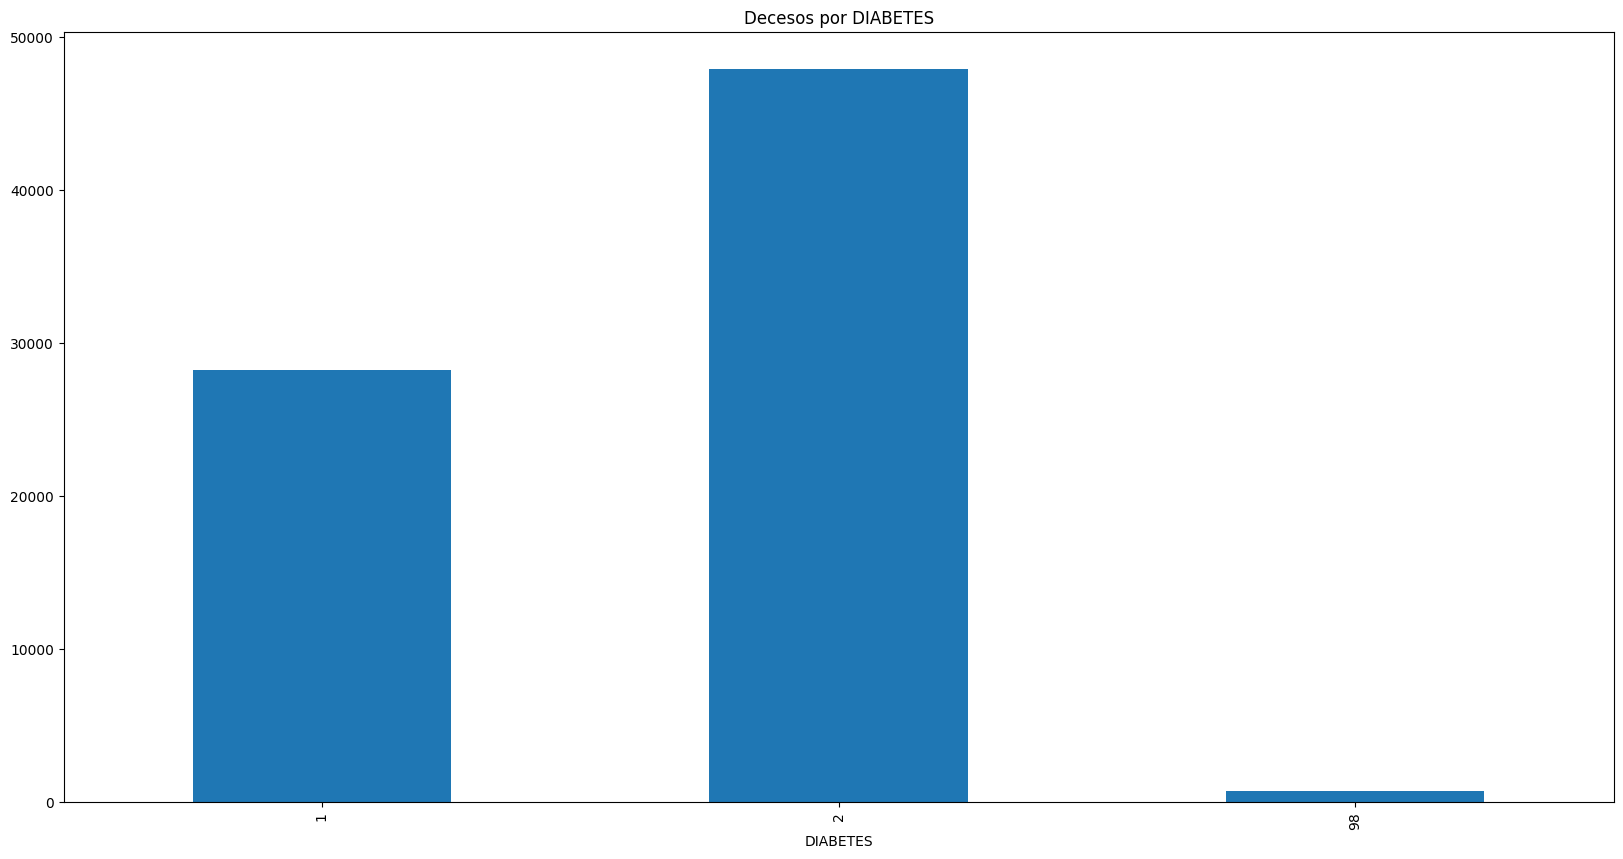

count    76942.000000
mean         2.544709
std          9.361084
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         98.000000
Name: DIABETES, dtype: float64


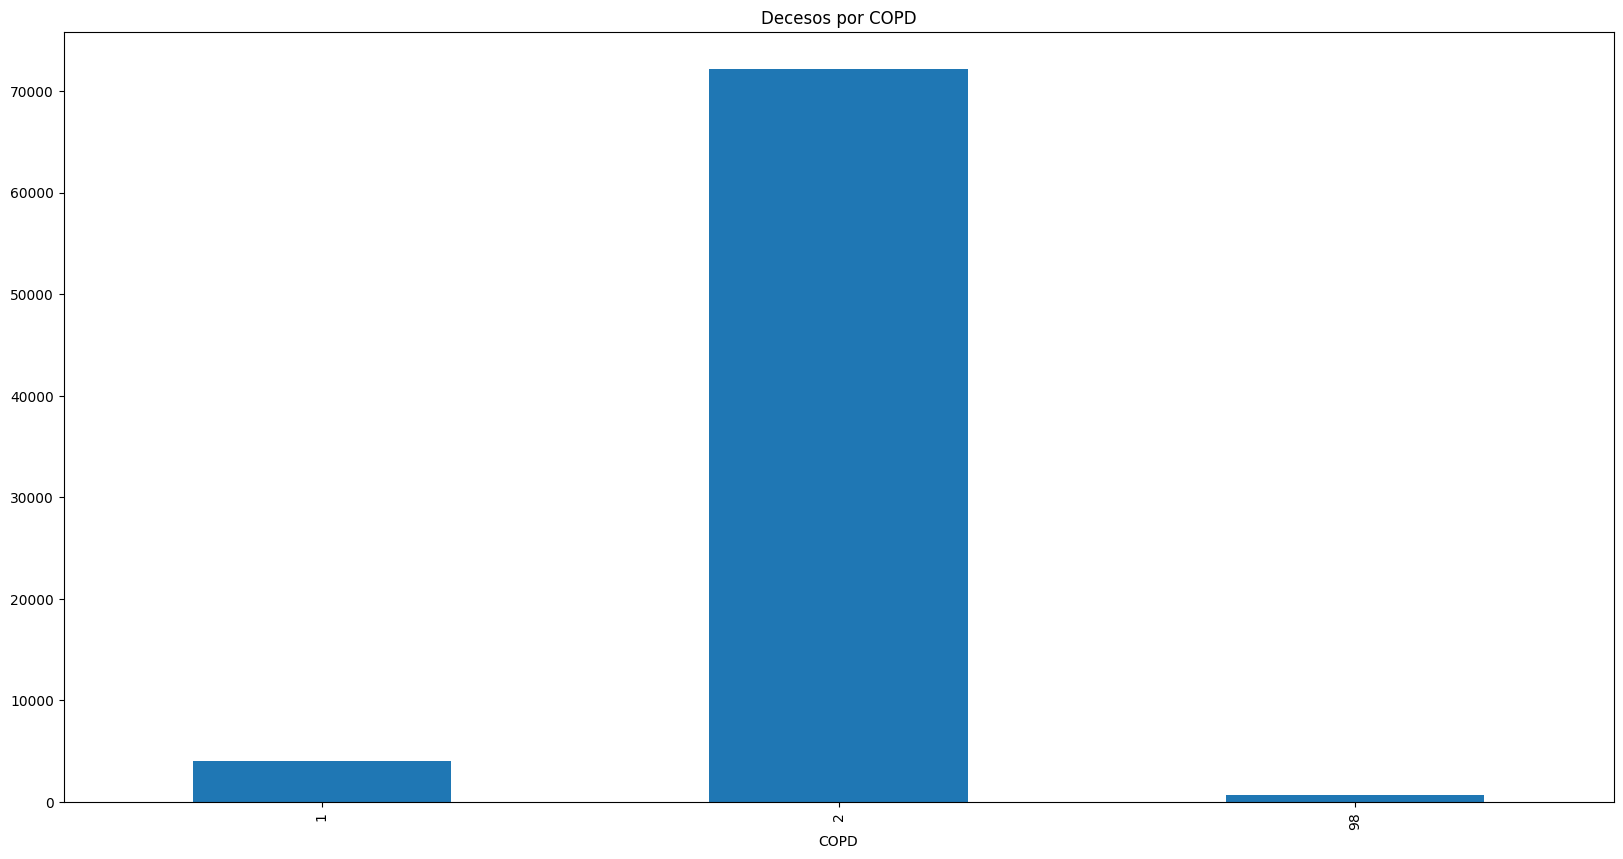

count    76942.000000
mean         2.834850
std          9.193417
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         98.000000
Name: COPD, dtype: float64


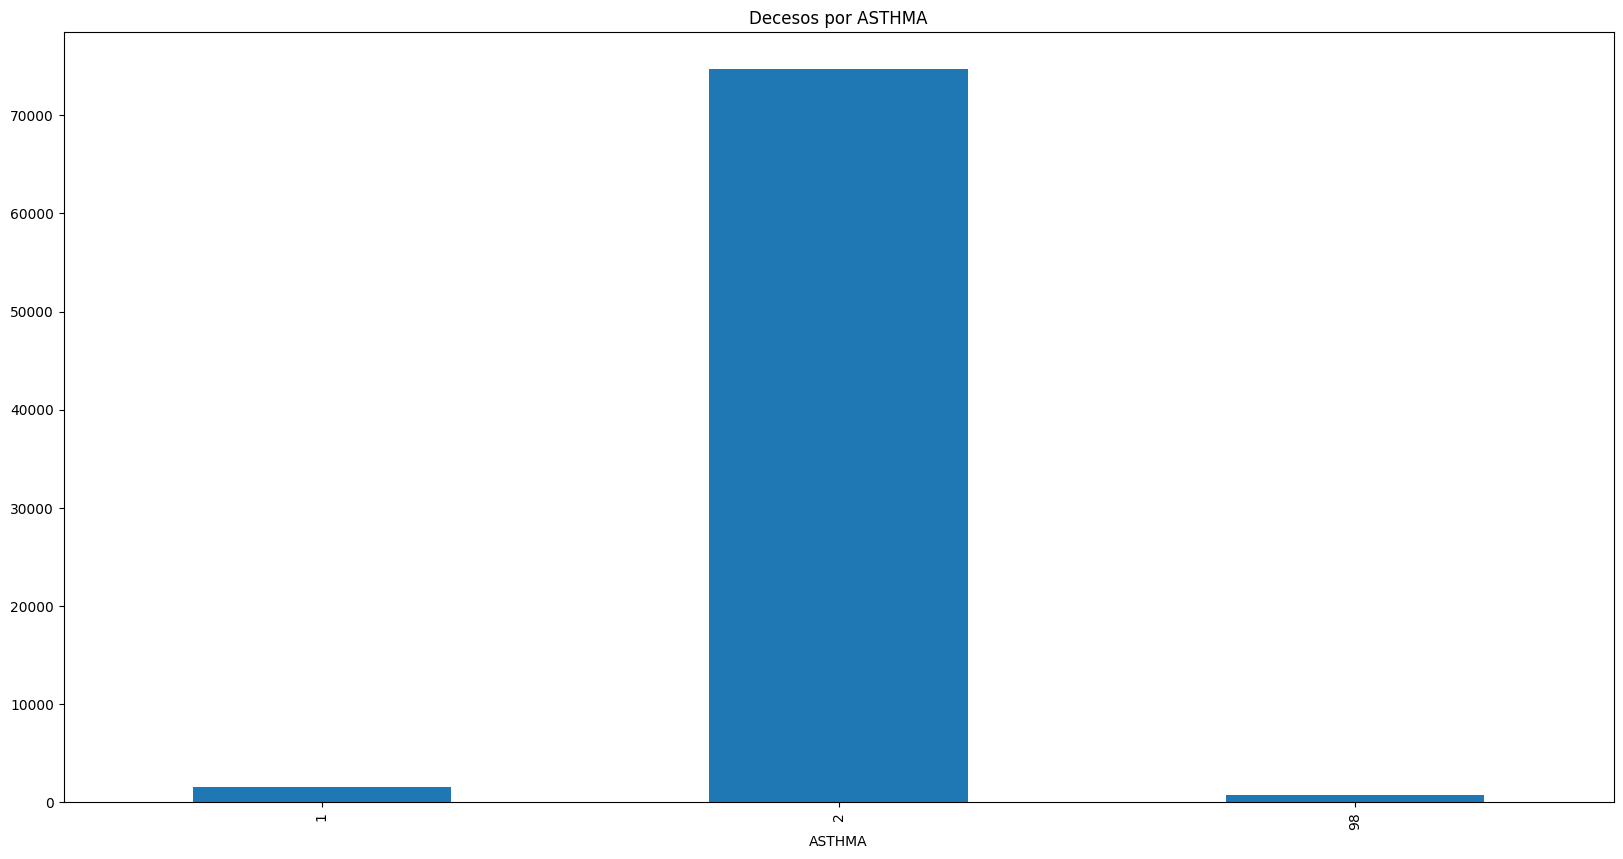

count    76942.000000
mean         2.859141
std          9.143647
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         98.000000
Name: ASTHMA, dtype: float64


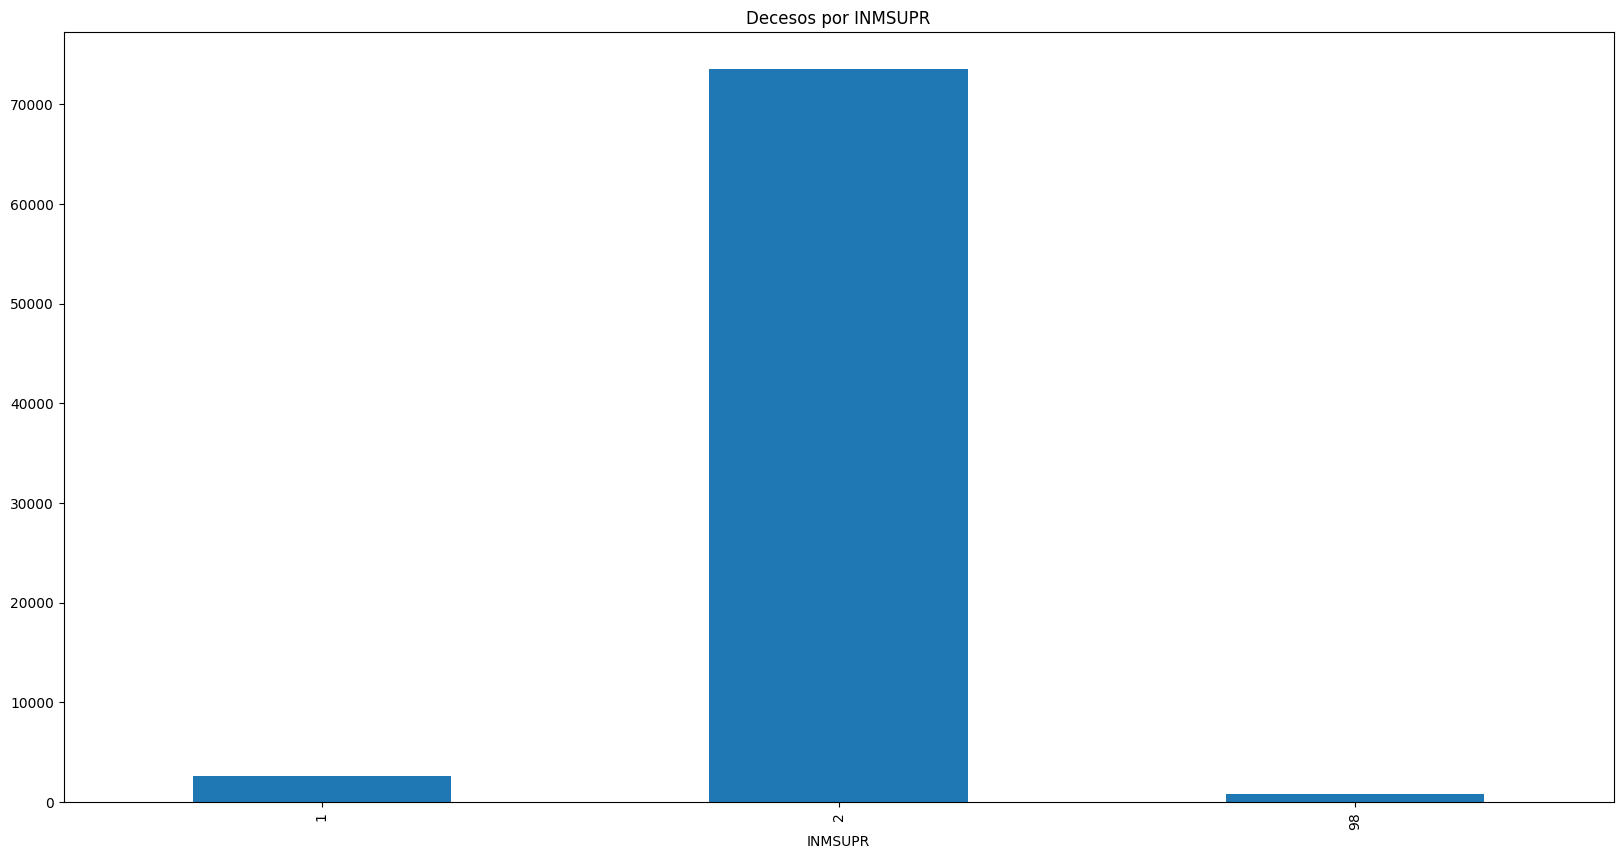

count    76942.000000
mean         2.907983
std          9.468028
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         98.000000
Name: INMSUPR, dtype: float64


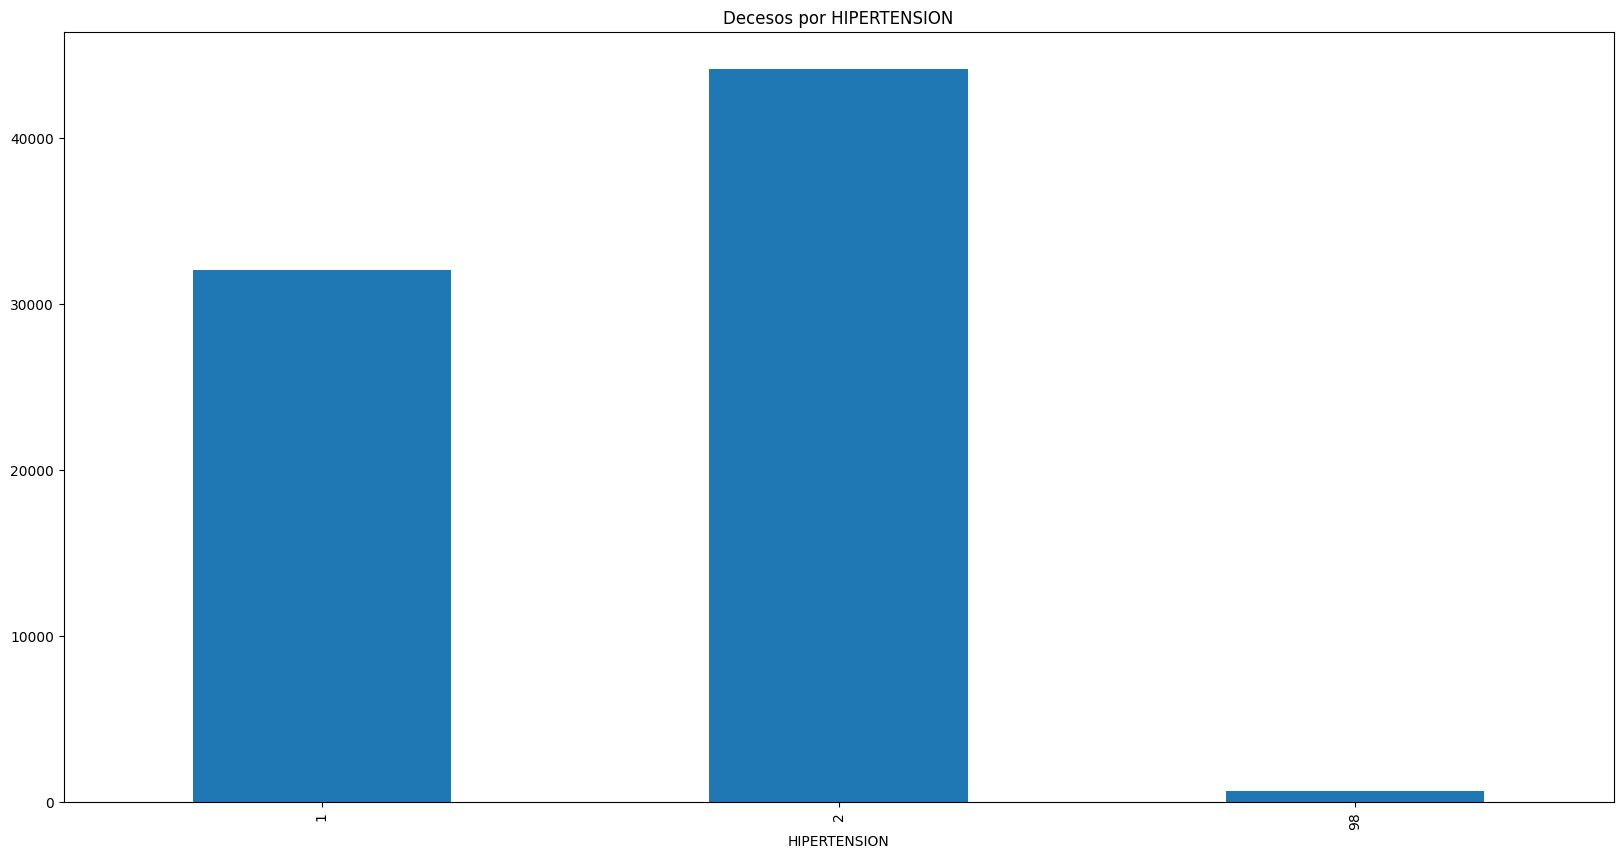

count    76942.000000
mean         2.444218
std          9.103166
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         98.000000
Name: HIPERTENSION, dtype: float64


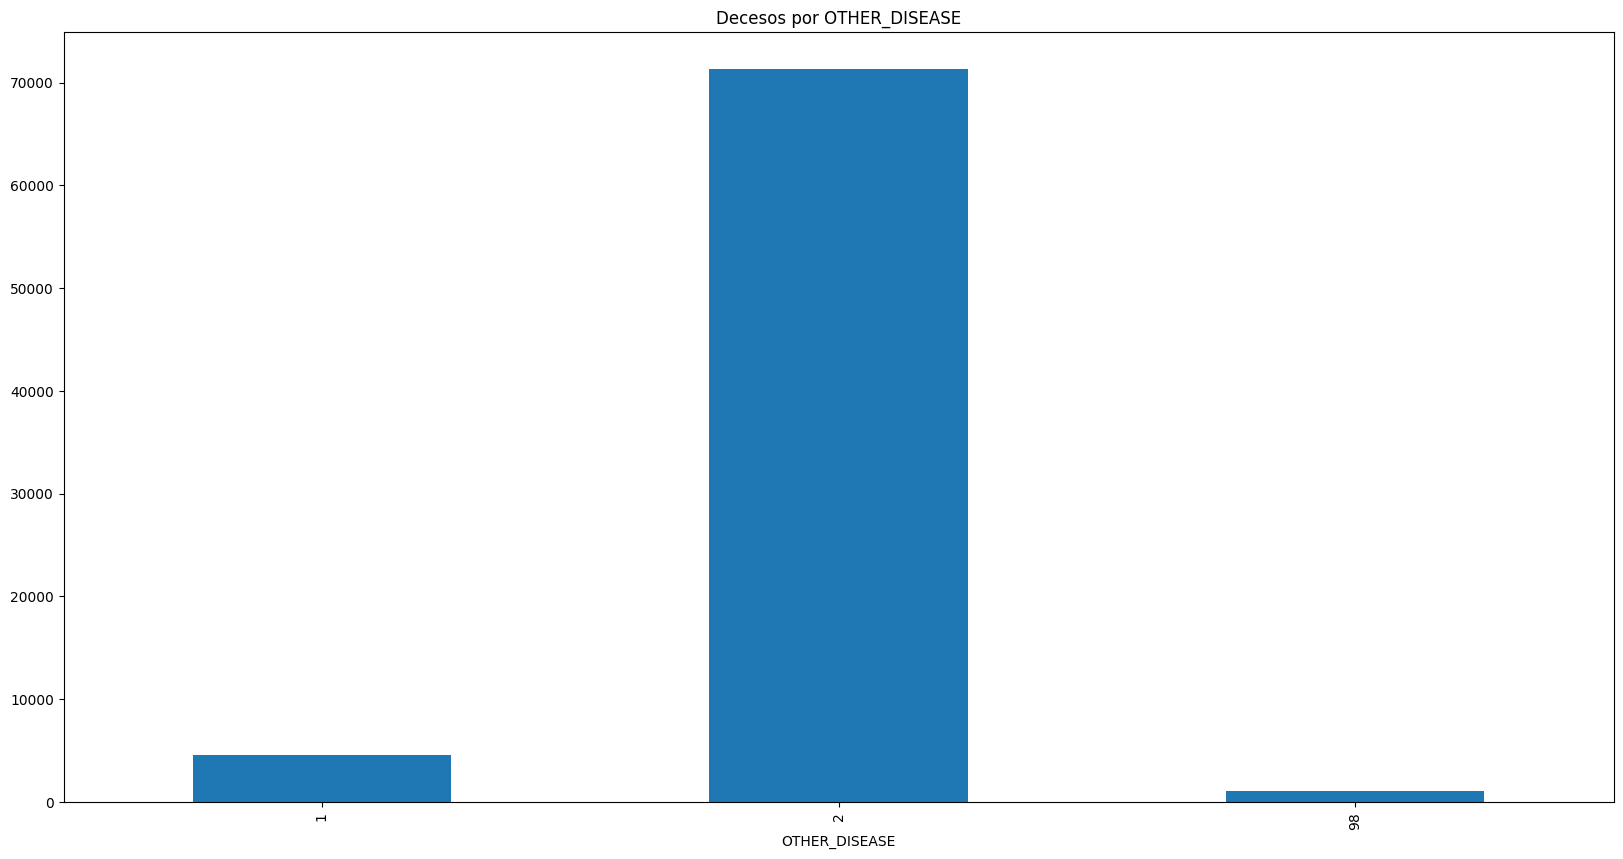

count    76942.000000
mean         3.231031
std         11.063283
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         98.000000
Name: OTHER_DISEASE, dtype: float64


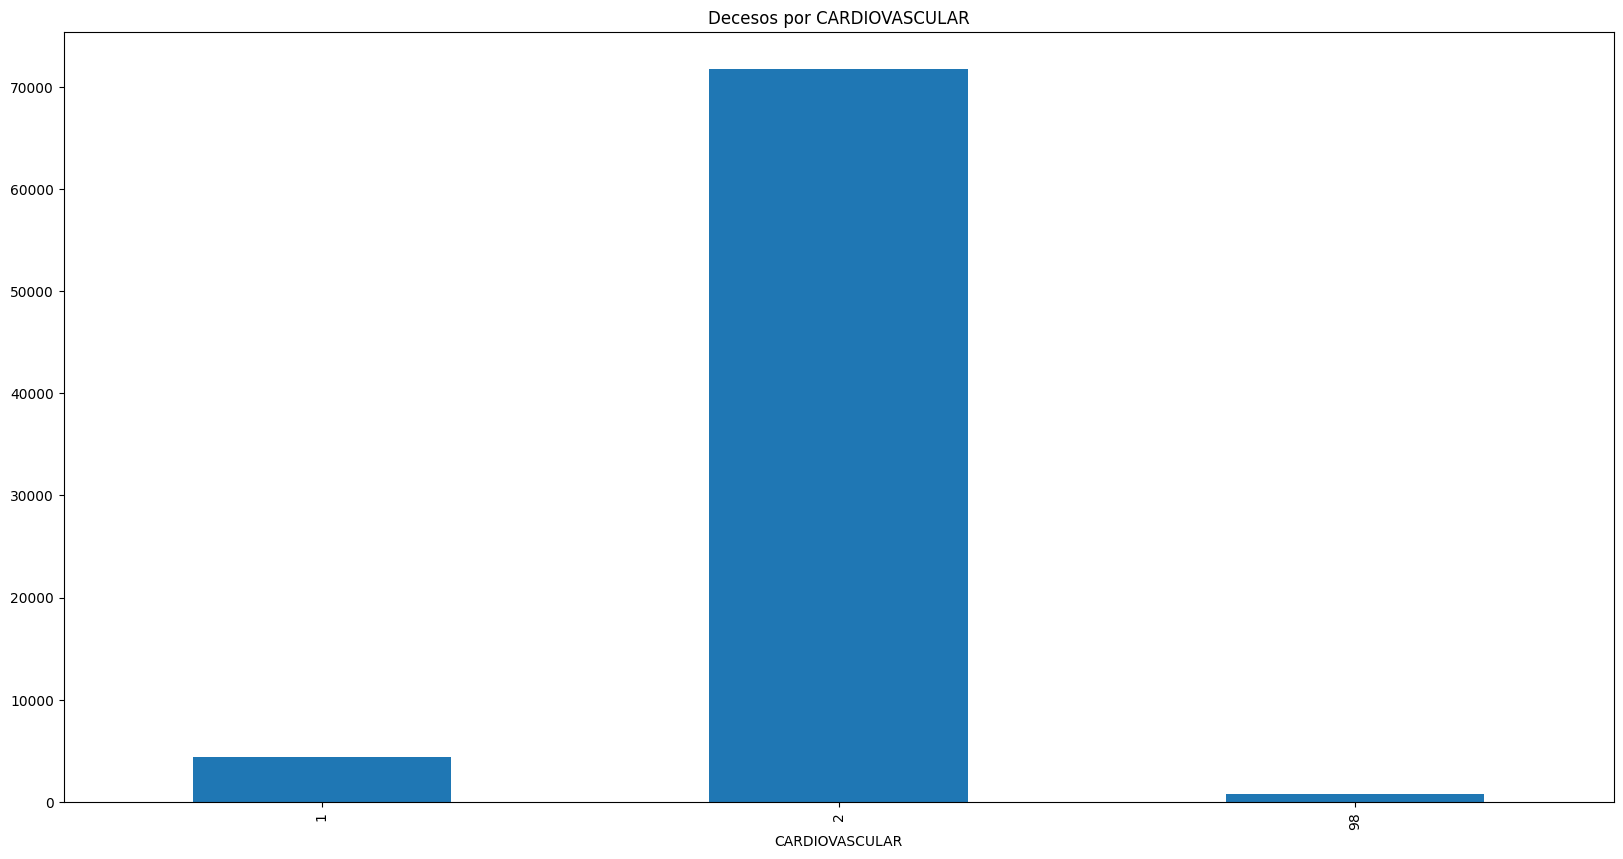

count    76942.000000
mean         2.856918
std          9.333924
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         98.000000
Name: CARDIOVASCULAR, dtype: float64


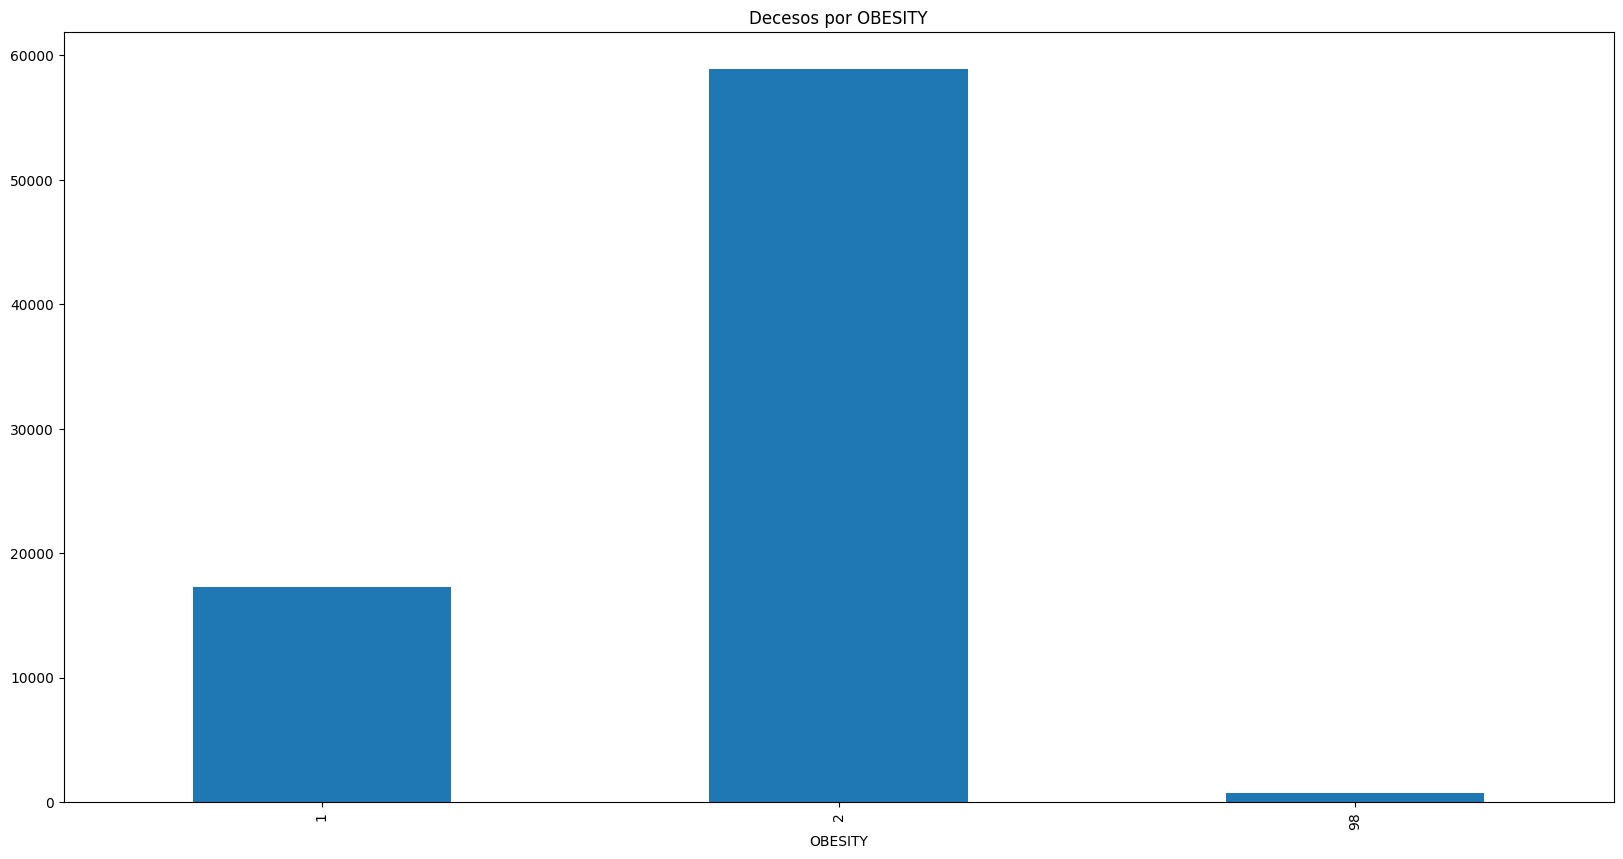

count    76942.000000
mean         2.667334
std          9.242413
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         98.000000
Name: OBESITY, dtype: float64


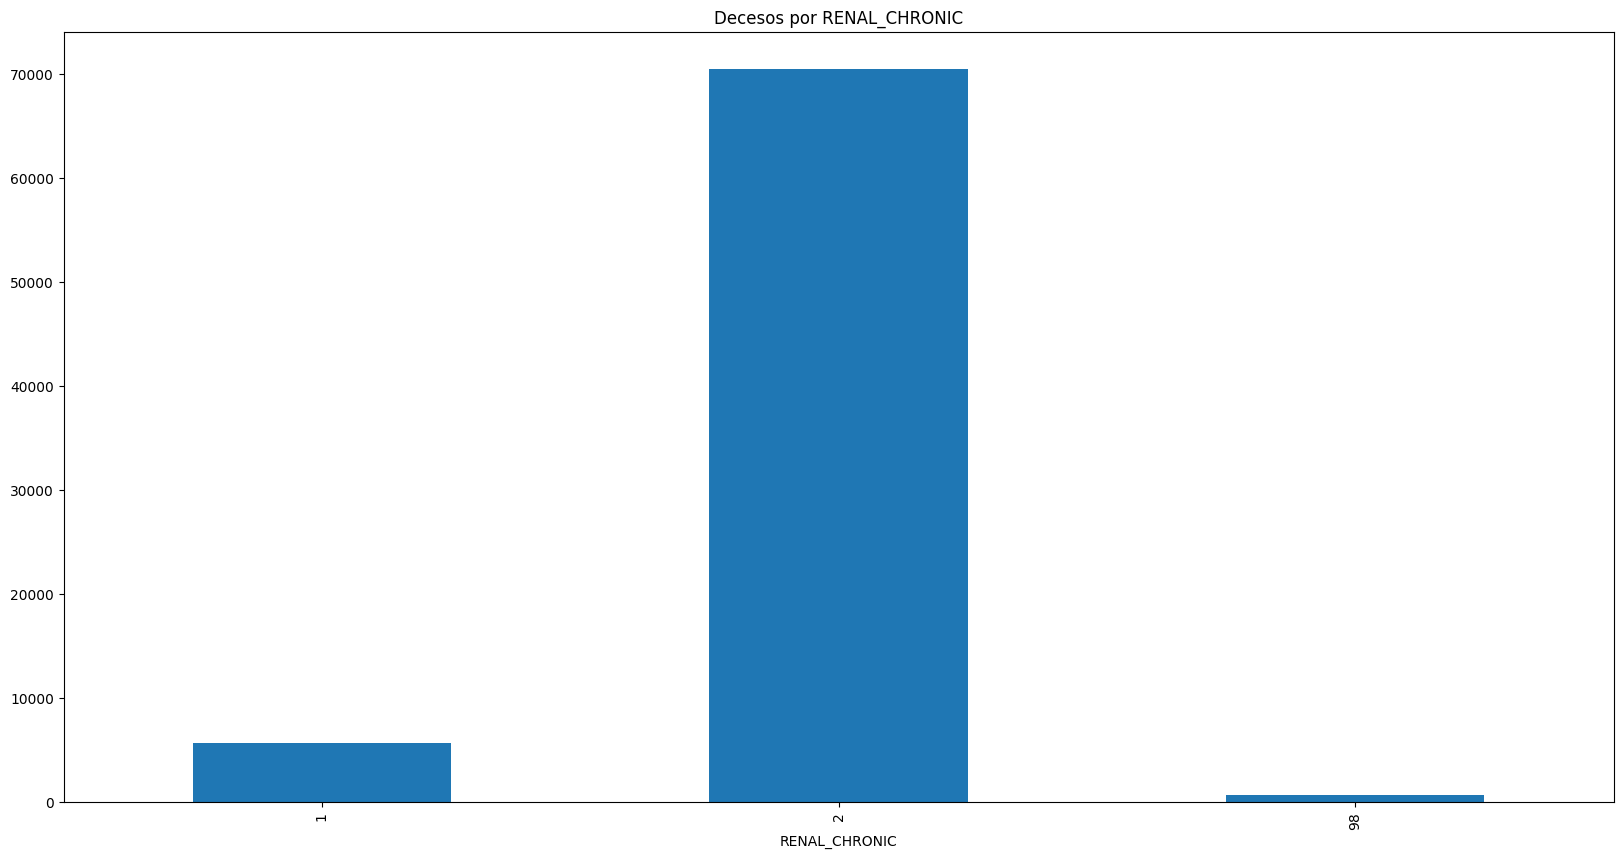

count    76942.000000
mean         2.802955
std          9.145208
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         98.000000
Name: RENAL_CHRONIC, dtype: float64


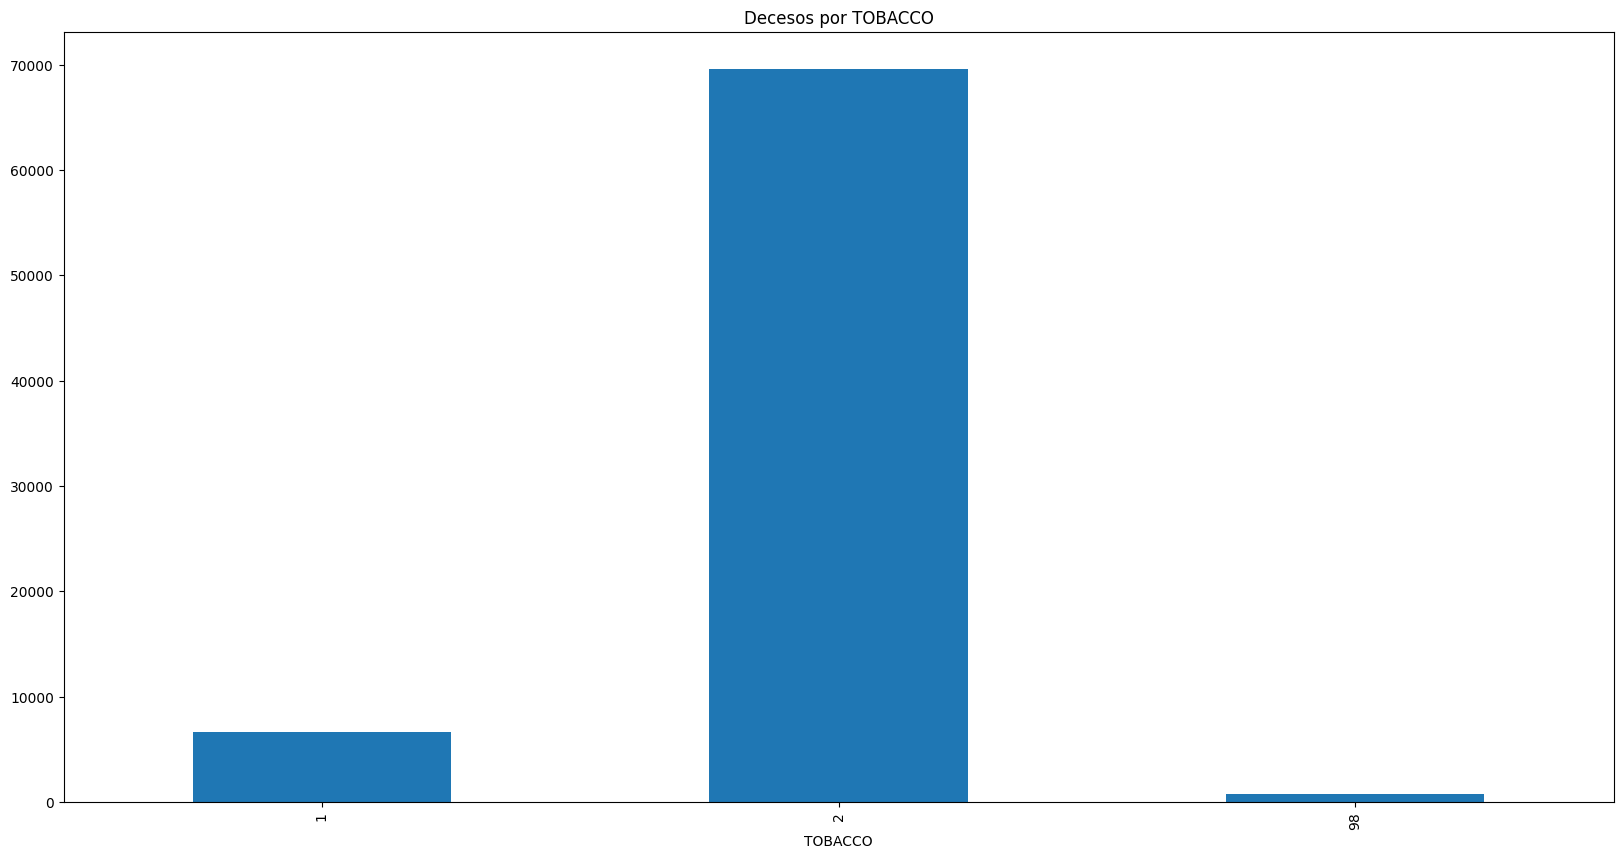

count    76942.000000
mean         2.818851
std          9.287398
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         98.000000
Name: TOBACCO, dtype: float64


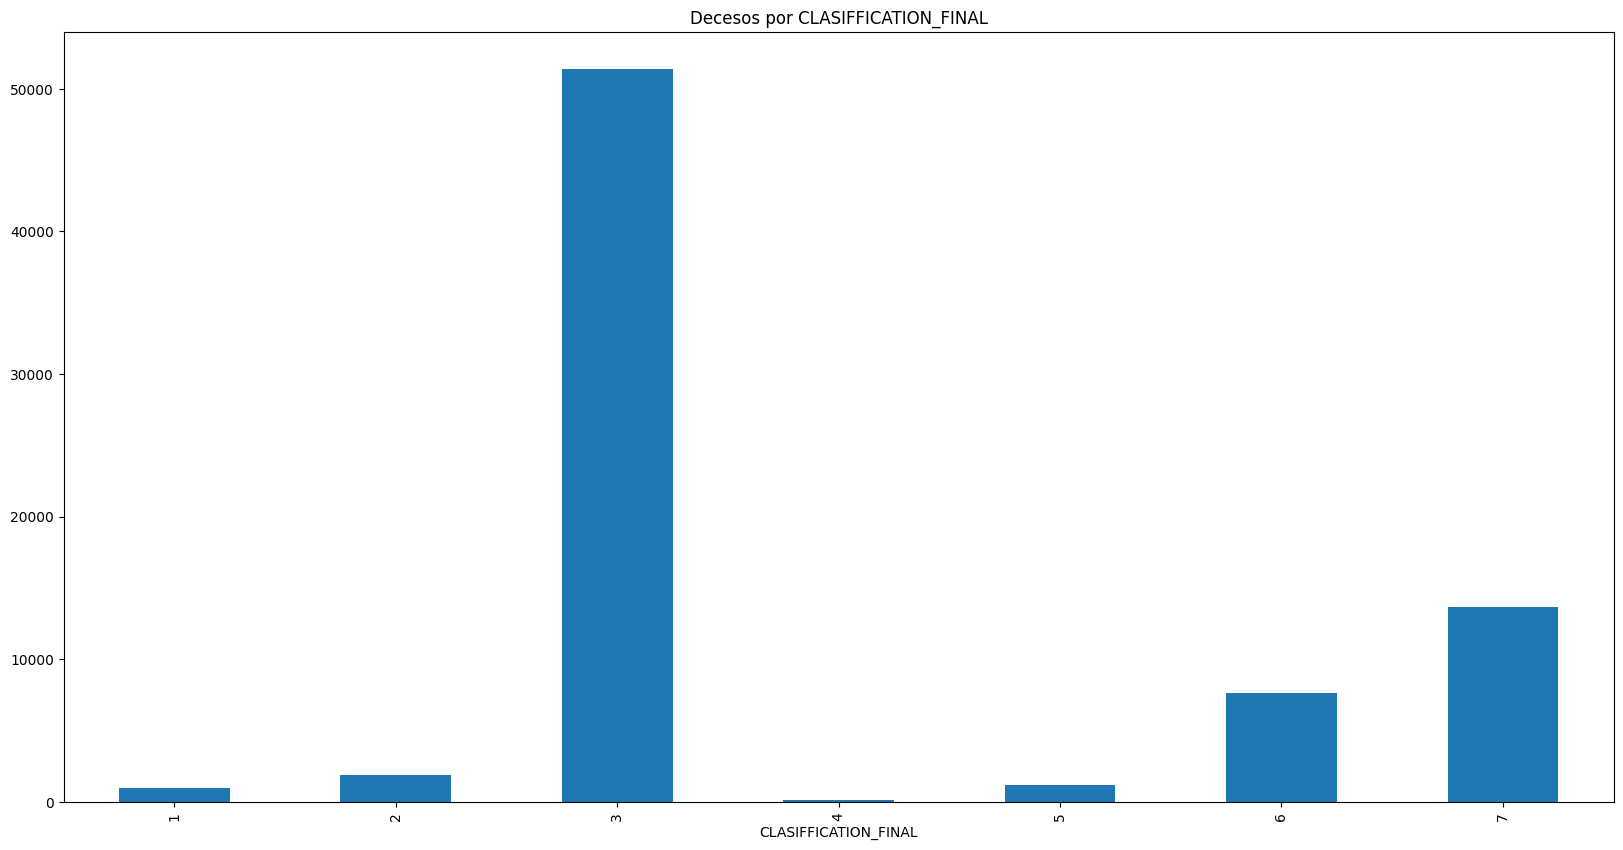

count    76942.000000
mean         3.994840
std          1.700541
min          1.000000
25%          3.000000
50%          3.000000
75%          6.000000
max          7.000000
Name: CLASIFFICATION_FINAL, dtype: float64


In [11]:
#Observemos graficamente algunas características de los que murieron
#Excluyamos algunas características que no son relevantes
carExc = ["MEDICAL_UNIT","USMER","DATE_DIED","ICU","Estatus"]
for columna in data.columns:
    if columna in carExc:
        continue
    distribucion_decesos(columna)

Utilizando las gráficas anteiores podemos darnos cuenta en cuales características contamos con los datos suficientes como para poder predecir si un paciente vive o muere. Estas características son:
* SEX
* PATIENT_TYPE
* INTUBED
* PNEUMONIA
* AGE
* DIABETES
* COPD
* ASTHMA
* INMSUPR
* HIPERTENSION
* OTHER_DISEASE
* CARDIOVASCULAR
* OBESITY
* RENAL_CHRONIC
* TOBACCO
* CLASIFFICATION_FINAL
Tenemos que formatear la columna "CLASIFFICATION_FINAL" para poder trabajar con los pacientes con pruebas no concluyentes.

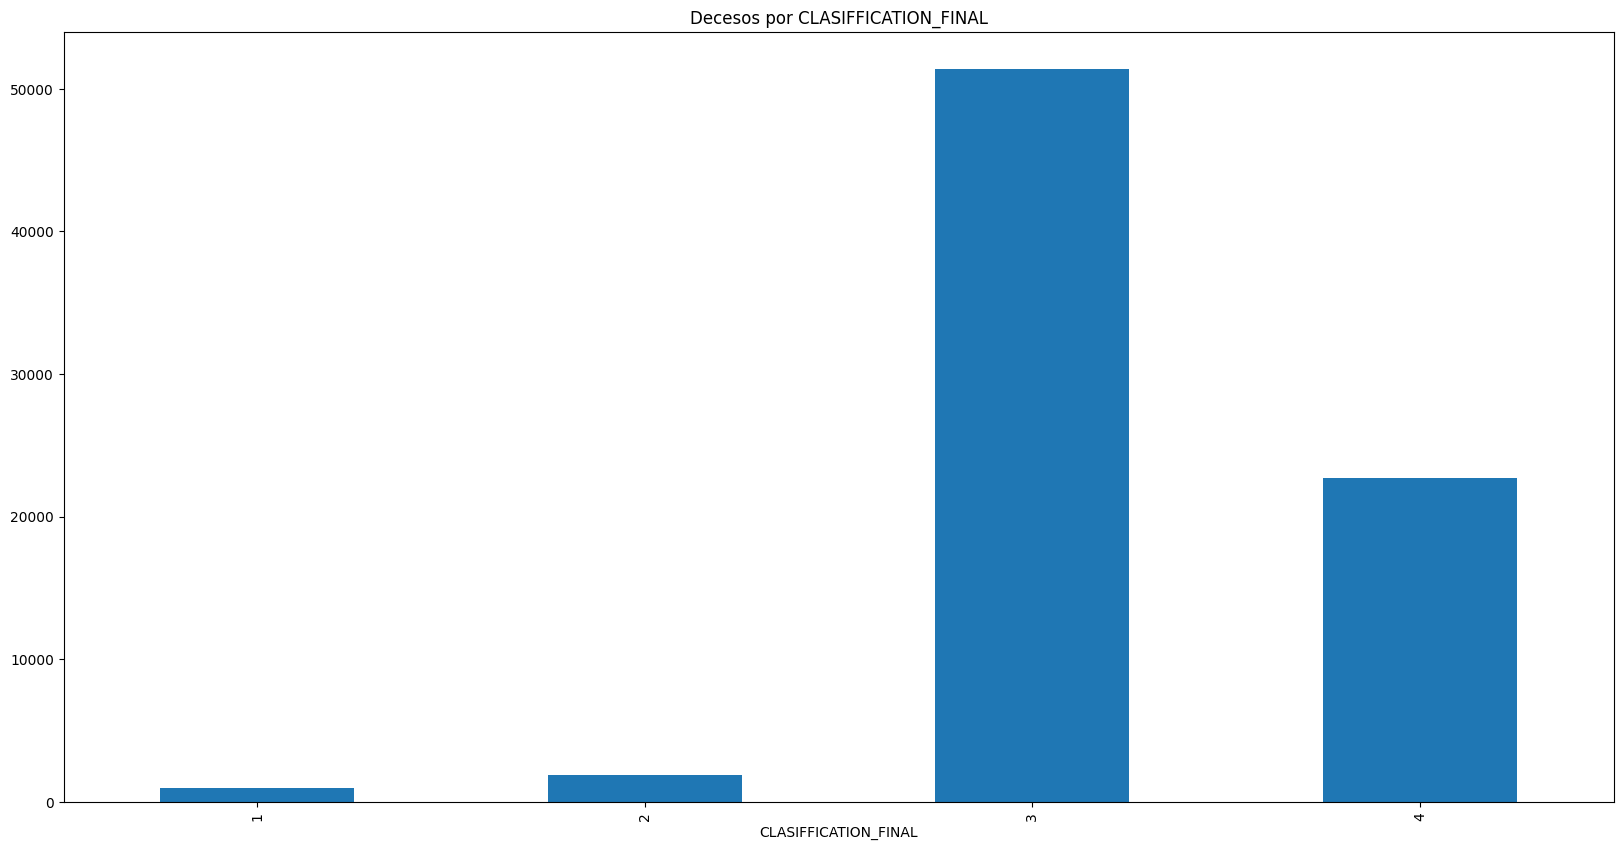

count    76942.000000
mean         3.246224
std          0.555147
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: CLASIFFICATION_FINAL, dtype: float64


In [12]:
# Si en la columna CLASIFFICATION_FINAL el valor es mayor o igual que 4 significa que la prueba de covid no fue concluyente, pongamos para estos valores el valor de 4
data.loc[data["CLASIFFICATION_FINAL"] >= 4, "CLASIFFICATION_FINAL"] = 4
#Grafiquemos la distribución de los decesos por CLASIFFICATION_FINAL
distribucion_decesos("CLASIFFICATION_FINAL")

## Fase 2 - Modelo de Aprendizaje

- Conjunto de Entrenamiento
- Conjunto de Pruebas
- Modelo de Clasificación/Regresión
- Ajuste/Entrenamiento
- Pruebas de Validación

Nuestro objetivos es decir si un paciente de COVID 19 va a vivir o sobrevivir con base en las características anteriormente mencionadas. Comparemos diferentes modelos para observar su eficiencia.

In [13]:
#Queremos entrenar un modelo de machine learning para saber si nuestro paciente va a morir o no, para esto necesitamos unicamente las columnas que nos interesan
caract = ["SEX","PATIENT_TYPE","INTUBED","PNEUMONIA","AGE","DIABETES","COPD","ASTHMA","INMSUPR","HIPERTENSION","OTHER_DISEASE","CARDIOVASCULAR","OBESITY","RENAL_CHRONIC","TOBACCO","CLASIFFICATION_FINAL","Estatus"]
data = data[caract]
data.sample(5)

,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Estatus
697300,2,1,97,2,56,2,2,2,2,1,2,2,2,2,2,4,1
605734,2,1,97,2,49,2,2,2,2,2,2,2,2,2,2,3,1
856685,1,1,97,2,46,2,2,2,2,2,2,2,2,2,2,4,1
630970,1,1,97,2,83,1,2,2,2,1,2,2,1,2,2,3,1
752641,1,1,97,2,44,2,2,2,2,2,2,2,2,2,2,4,1


In [14]:
# Elaboremos los conjuntos de entrenamiento y prueba, la variable a predecir es Estatus
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop("Estatus", axis=1), data["Estatus"], test_size=0.2)

In [15]:
#Importaremos un modelo de regresion lineal
from sklearn.linear_model import LinearRegression
#Creamos el modelo
modelo = LinearRegression()
#Entrenamos el modelo
modelo.fit(X_train, y_train)
#Hagamos las predicciones
y_pred = modelo.predict(X_test)

modelo.score(X_test, y_test)*100


30.383564332282997

In [16]:
#Importaremos un modelo de regresion logistica
from sklearn.linear_model import LogisticRegression
#Creamos el modelo
modelo = LogisticRegression()
#Entrenamos el modelo
modelo.fit(X_train, y_train)
#Hagamos las predicciones
y_pred = modelo.predict(X_test)

modelo.score(X_test, y_test)*100


/home/ramssesdls/Documents/Python/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


93.46064897599122

In [17]:
#Importaremos un modelo de perceptron
from sklearn.linear_model import Perceptron
#Creamos el modelo
modelo = Perceptron()
#Entrenamos el modelo
modelo.fit(X_train, y_train)
#Hagamos las predicciones
y_pred = modelo.predict(X_test)

modelo.score(X_test, y_test)*100


92.66576067520205

In [19]:
#Importaremos un modelo de arbol de decision
from sklearn.ensemble import RandomForestClassifier
#Creamos el modelo
modelo = RandomForestClassifier()
#Entrenamos el modelo
modelo.fit(X_train, y_train)
#Hagamos las predicciones
y_pred = modelo.predict(X_test)

modelo.score(X_test, y_test)*100

94.50492334835371

In [20]:
#Importemos las metricas de evaluación
from sklearn.metrics import mean_squared_error, r2_score
#Calculemos el error cuadratico medio
print("Error cuadratico medio: ", mean_squared_error(y_test, y_pred))
#Calculemos el coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))


Error cuadratico medio:  0.05495076651646282
Coeficiente de determinación:  0.19151236490616386


## Fase 3 - Reportes y Resultados

- Validación de Aprendizaje
- Generar gráficas de desempeño
- Reporte de Métricas

Ahora construyamos una curva tipo ROC para medir la razón entre los verdaderos positivos contra los falsos positivos.


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

classifiers = {
    "Percepron": Perceptron(),
    "LogReg": LogisticRegression(),
    "RandForest": RandomForestClassifier(),
    "Gaussian": GaussianNB()
}

/home/ramssesdls/Documents/Python/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


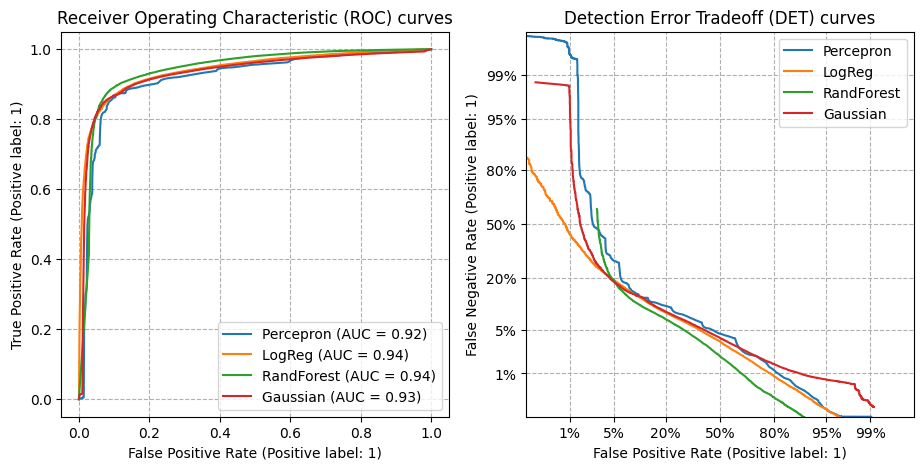

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

# Obtenemos dos gráficas para las curvas ROC y DET
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

# Recorremos cada clasificador y obtenemos sus curvas tipo ROC y DET
for name, clf in classifiers.items():
    # Entrenamos el clasificador con los datos de entrenamiento
    clf.fit(X_train, y_train)

    # Agregamos la curva tipo ROC con los datos de prueba
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    # Agregamos la curva tipo DET con los datos de prueba
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

# Ponemos los títulos de cada gráfica
ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

# Definimos el tipo de líneas
ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

# Mostramos las gráficas
plt.legend()
plt.show()

Podemos notar que de los modelos elegidos el que tuvo mejor desempeño fue la regresión logística esto al tomar en cuenta el área bajo la curva y el score arrojado de la evaluación de los datos predichos contra los reales.